<a href="https://colab.research.google.com/github/HariniParam/Network-Intrusion-Detection/blob/main/Intrusion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**DATASET**

In [21]:
url = "/train_dataset.csv"
data = pd.read_csv(url)
test_data = pd.read_csv("/test_dataset.csv")
data.head()

Port Number  Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0            4            305111        25506841   100234870        284579   
1            2               209           20671     6316631           274   
2            4               150           19774     6475473          3054   
3            1              4699       100986365   124574097        413351   
4            3               990          104058       88896           778   

   Port alive Duration (S)  Packets Rx Dropped  Packets Tx Dropped  \
0                     1657                   0                   0   
1                       96                   0                   0   
2                      166                   0                   0   
3                     2267                   0                   0   
4                      792                   0                   0   

   Packets Rx Errors  Packets Tx Errors  ...  Unknown Load/Rate  \
0                  0                  0  ...                  0   
1                  0                  0  ...             183877   
2                  0                  0  ...                502   
3                  0                  0  ...                  0   
4                  0                  0  ...                715   

   Unknown Load/Latest  Latest bytes counter  is_valid  Table ID  \
0                    0                     0         1         0   
1              6303353                183877         1         0   
2              6439888                   502         1         0   
3                    0                     0         1         0   
4                 7152                   715         1         0   

   Active Flow Entries  Packets Looked Up  Packets Matched  Max Size  Label  
0                    6             992868           992744        -1      0  
1                    8              90551            90494        -1      3  
2                    6               7516             7418        -1      2  
3                    8             664849           664714        -1      0  
4                    5               4328             4201        -1      1  

[5 rows x 32 columns]

**DATA PREPROCESSING**

In [22]:
# Check for missing values
missing_values = data.isnull().sum()

#Filling missing values with mean
data.fillna(data.mean(), inplace=True)

# Check the data types of each column
data_types = data.dtypes
print(data_types)

# Print summary statistics of the DataFrame
summary_stats = data.describe()
print(summary_stats)

Port Number                      int64
Received Packets                 int64
Received Bytes                   int64
Sent Bytes                       int64
Sent Packets                     int64
Port alive Duration (S)          int64
Packets Rx Dropped               int64
Packets Tx Dropped               int64
Packets Rx Errors                int64
Packets Tx Errors                int64
Delta Received Packets           int64
Delta Received Bytes             int64
Delta Sent Bytes                 int64
Delta Sent Packets               int64
Delta Port alive Duration (S)    int64
Delta Packets Rx Dropped         int64
 Delta Packets Tx Dropped        int64
Delta Packets Rx Errors          int64
Delta Packets Tx Errors          int64
Connection Point                 int64
Total Load/Rate                  int64
Total Load/Latest                int64
Unknown Load/Rate                int64
Unknown Load/Latest              int64
Latest bytes counter             int64
is_valid                 

**DATA EXPLORATION**


Class Distribution:
0    2641
3     656
2     646
1     589
4     395
5      71
Name: Label, dtype: int64


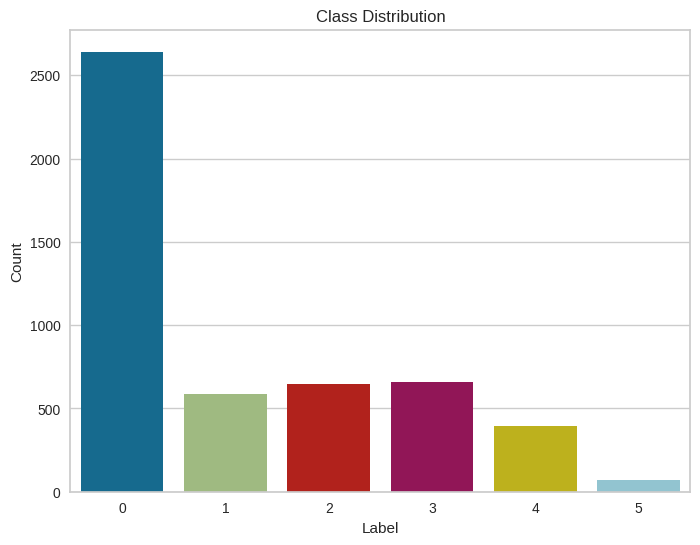

In [23]:
# Class distribution
class_distribution = data['Label'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

#visualization
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Label')
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

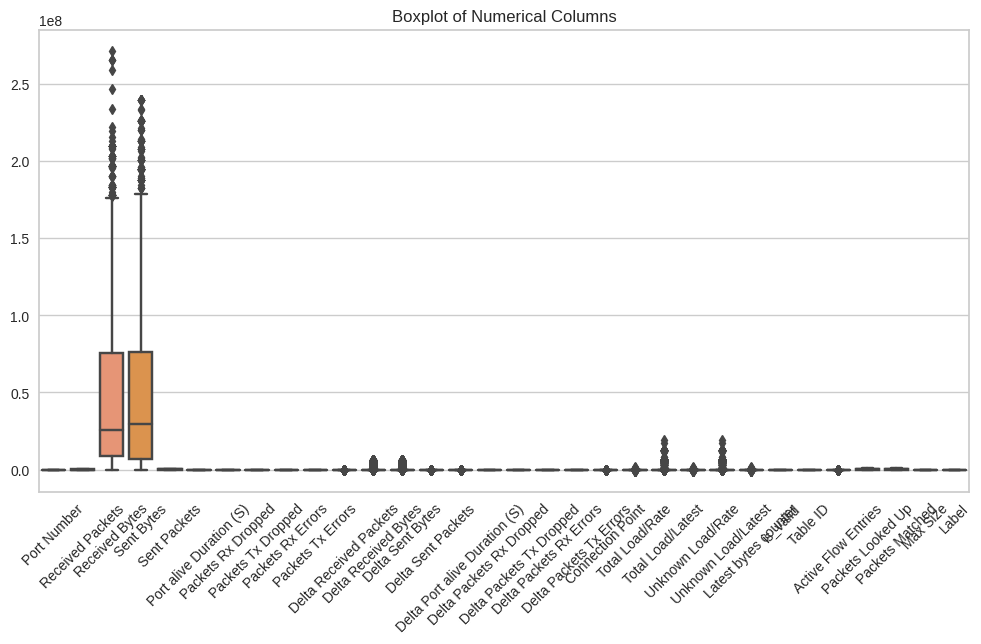

In [24]:
numerical_columns = data.select_dtypes(include=['number'])

# Boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_columns, orient='v')
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()


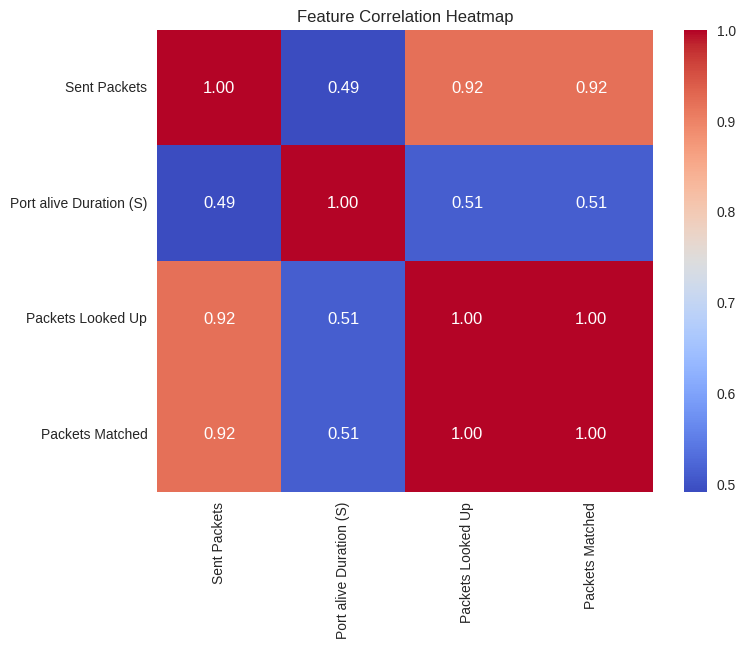

In [25]:
# Feature correlation heatmap
selected_features = ['Sent Packets', 'Port alive Duration (S)', 'Packets Looked Up','Packets Matched']
correlation_matrix = data[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**RANDOM FOREST**

In [26]:
X_train = data.drop('Label', axis=1)
Y_train = data['Label']

# Create a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, Y_train)
feature_importances = classifier.feature_importances_
sfm = SelectFromModel(classifier, threshold=0.1)

# Fit the model to your data
sfm.fit(X_train, Y_train)
y_pred = classifier.predict(test_data)
test_data['RF_predicted_Label'] = y_pred
print(test_data)

      Port Number  Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0               2              1516        37852942    35609292        246092   
1               3            182335       191155854   232913950        292956   
2               1            180594        58085529    12697283        300026   
3               2               280         6317648       14403           109   
4               3            173724        32530097    19003413        151576   
...           ...               ...             ...         ...           ...   
2138            1              2337        44196472    63296904          4084   
2139            1             92300        11293711       21248           162   
2140            1              6513       126276923   187693958        415927   
2141            3            118473        17630034    51116876        316331   
2142            2               885           88715    25274348          1172   

      Port alive Duration (

0    1132
2     305
3     288
1     255
4     154
5       9
Name: RF_predicted_Label, dtype: int64


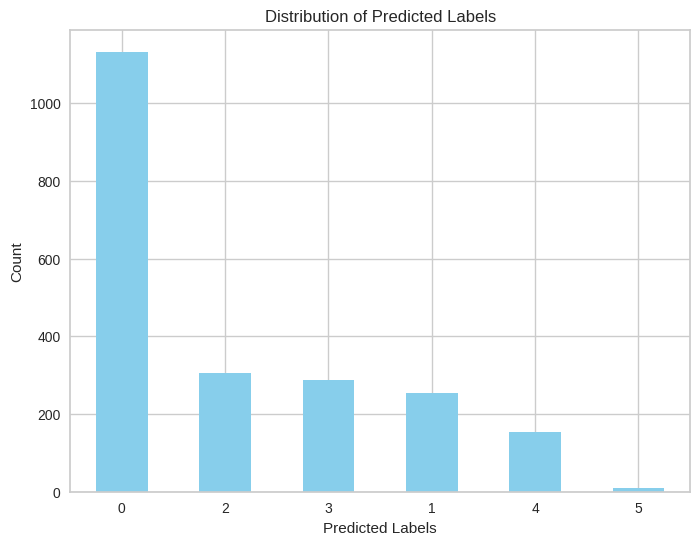

In [27]:
# Count the occurrences of each predicted label
label_counts = test_data['RF_predicted_Label'].value_counts()
print(label_counts)
# Plot the bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Labels')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**FEATURE SELECTION**

In [28]:
# Get the indices of selected features
selected_feature_indices = sfm.get_support(indices=True)

# Get the names of selected features
selected_features = X_train.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Sent Packets', 'Port alive Duration (S)', 'Packets Looked Up',
       'Packets Matched'],
      dtype='object')


**VISUALIZATION**

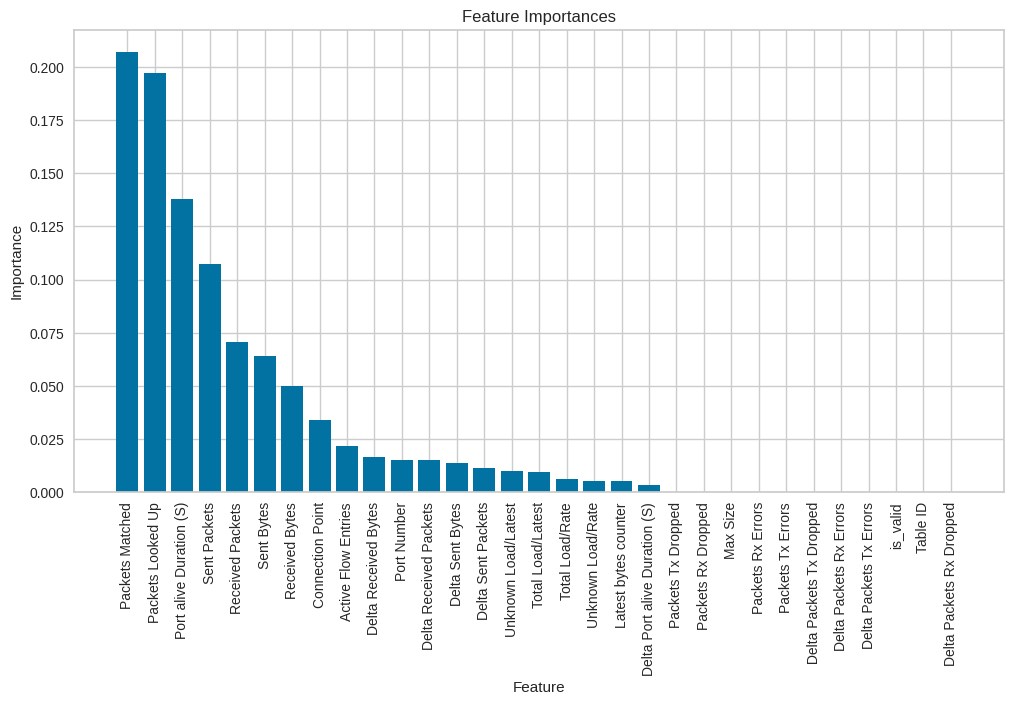

In [29]:
feature_names = X_train.columns
# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

**VISUALIZATION OF SINGLE DECISION TREE**

In [30]:
# Extracting single decision tree from the Random Forest
single_tree = classifier.estimators_[0]

# Export the decision tree to a DOT file
dot_data = export_graphviz(
    single_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names = ['Normal', 'Blackhole', 'TCP-SYN', 'PortScan', 'Diversion', 'Overflow'],
    filled=True,
    rounded=True
)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree
Image(graph.create_png())

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

**K-NEAREST NEIGHBOUR**

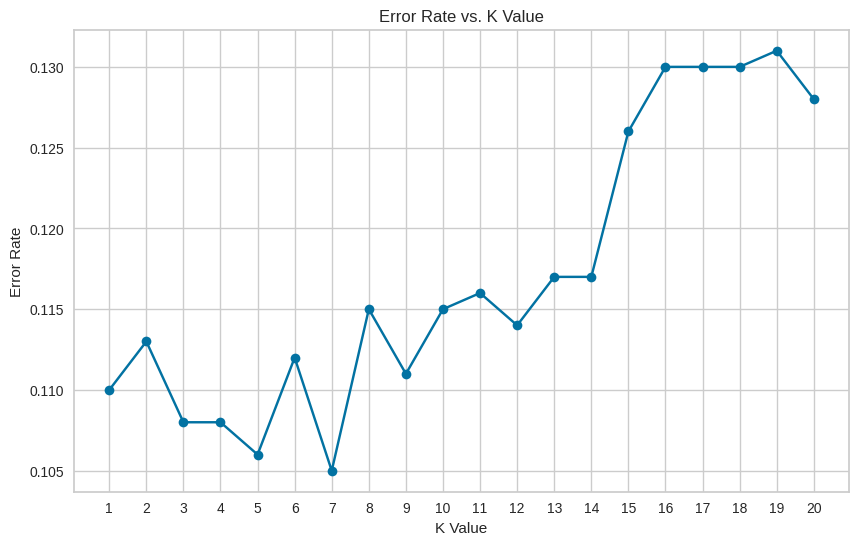

Optimal K Value: 7
Accuracy with K=7: 0.90


In [32]:
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find the optimal K value using the Elbow method
error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

# Plot the error rates for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#selecting the optimal K value
optimal_k = error_rates.index(min(error_rates)) + 1
print(f'Optimal K Value: {optimal_k}')

# Train the KNN model with the optimal K value
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Evaluate the KNN model on the test set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with K={optimal_k}: {accuracy:.2f}')


**VISUALIZATION**

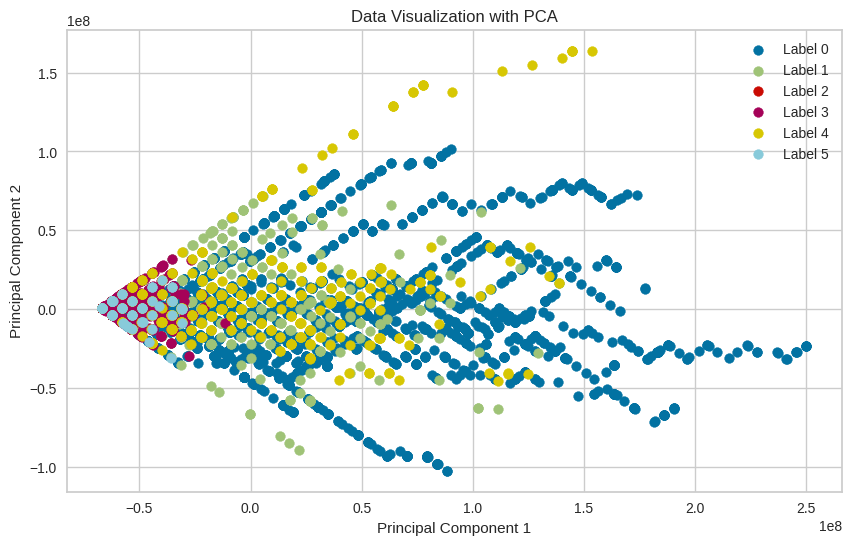

In [33]:
# Create a scatter plot for visualization
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Label {label}')

plt.title('Data Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# Standardize the test data using the same scaler
X_test = test_data.drop('RF_predicted_Label', axis=1)
X_test = scaler.transform(X_test)

predicted_labels = knn.predict(X_test)
test_data['KNN_Predicted_Label'] = predicted_labels
print(test_data)


      Port Number  Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0               2              1516        37852942    35609292        246092   
1               3            182335       191155854   232913950        292956   
2               1            180594        58085529    12697283        300026   
3               2               280         6317648       14403           109   
4               3            173724        32530097    19003413        151576   
...           ...               ...             ...         ...           ...   
2138            1              2337        44196472    63296904          4084   
2139            1             92300        11293711       21248           162   
2140            1              6513       126276923   187693958        415927   
2141            3            118473        17630034    51116876        316331   
2142            2               885           88715    25274348          1172   

      Port alive Duration (

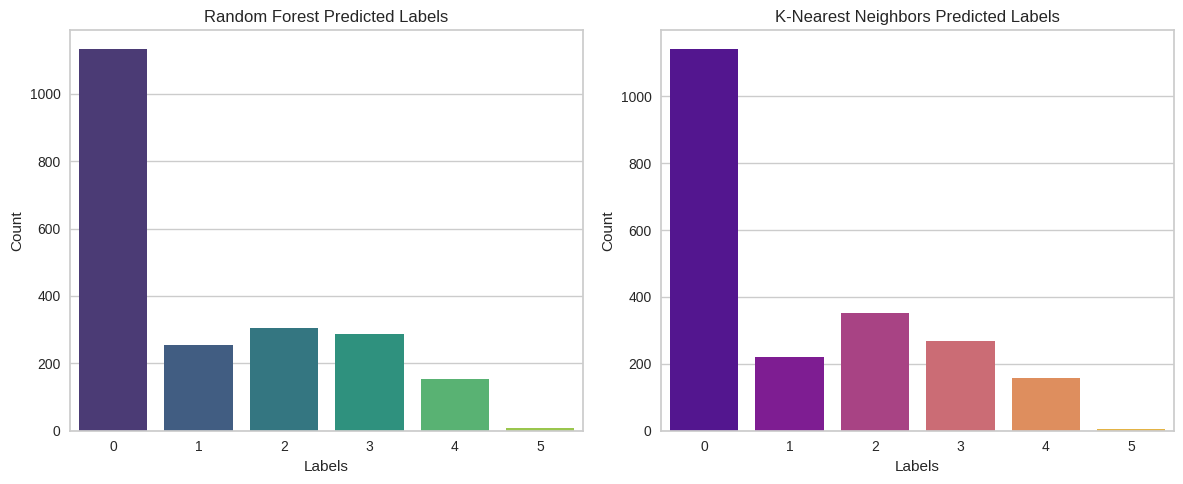

In [35]:
rf_predicted_labels = test_data['RF_predicted_Label']
knn_predicted_labels = test_data['KNN_Predicted_Label']

# Create a bar plot for RF predicted labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=rf_predicted_labels, palette='viridis')
plt.title('Random Forest Predicted Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# Create a bar plot for KNN predicted labels
plt.subplot(1, 2, 2)
sns.countplot(x=knn_predicted_labels, palette='plasma')
plt.title('K-Nearest Neighbors Predicted Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [36]:
# Calculate the size of the testing dataset
test_data_size = len(test_data)
train_data_subset = data.sample(n=test_data_size, random_state=42)
y_true = train_data_subset['Label']

#Random Forest
y_pred_rf = test_data['RF_predicted_Label']

#K-Nearest Neighbors
y_pred_knn = test_data['KNN_Predicted_Label']

#metrics for Random Forest
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_rf))
print("Precision:", precision_score(y_true, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_true, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_true, y_pred_rf, average='weighted'))

#metrics for K-Nearest Neighbors
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_knn))
print("Precision:", precision_score(y_true, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_true, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_true, y_pred_knn, average='weighted'))


Random Forest Metrics:
Accuracy: 0.3322445170321979
Precision: 0.32683501080103616
Recall: 0.3322445170321979
F1 Score: 0.32940458815578566
K-Nearest Neighbors Metrics:
Accuracy: 0.33364442370508635
Precision: 0.3263934083225578
Recall: 0.33364442370508635
F1 Score: 0.3295624964408361


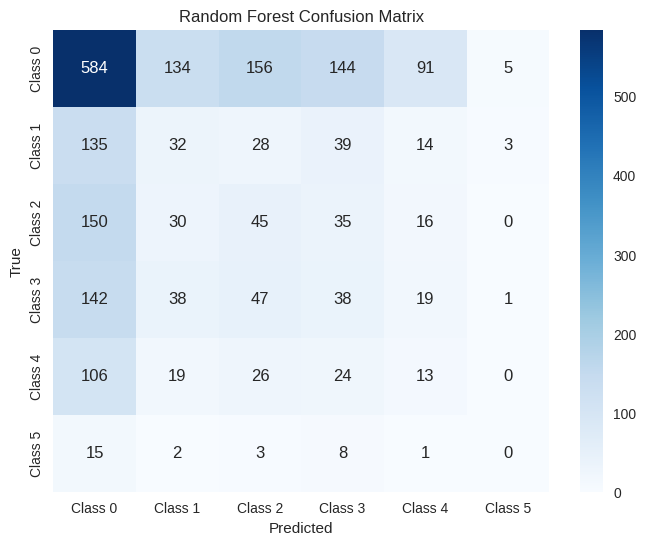

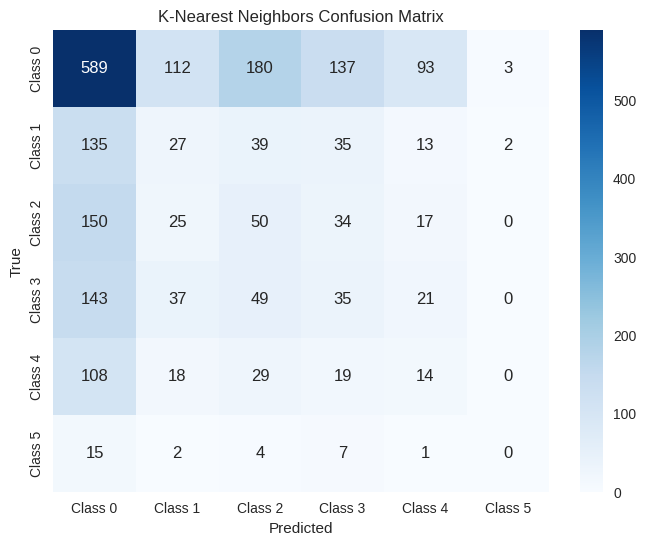

In [37]:
# Create confusion matrices for Random Forest and K-Nearest Neighbors
confusion_rf = confusion_matrix(train_data_subset['Label'], test_data['RF_predicted_Label'])
confusion_knn = confusion_matrix(train_data_subset['Label'], test_data['KNN_Predicted_Label'])

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the confusion matrix for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()